# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


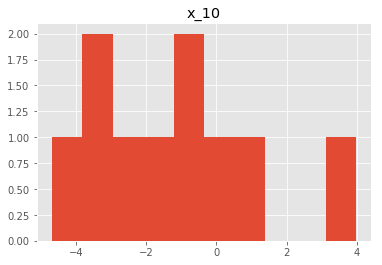

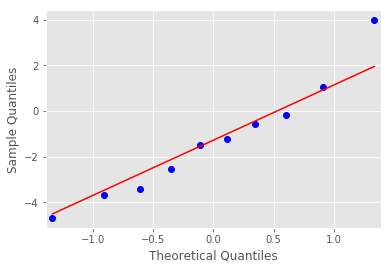

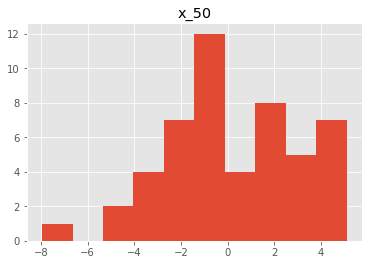

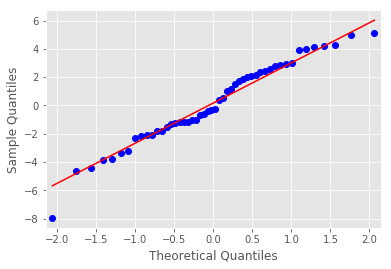

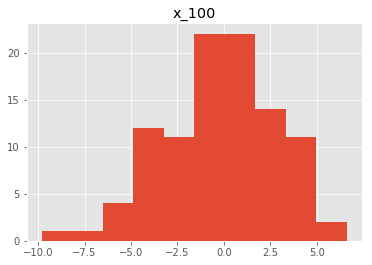

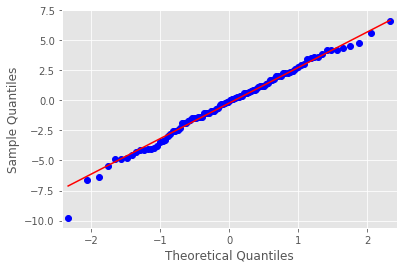

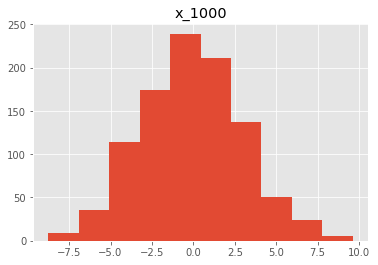

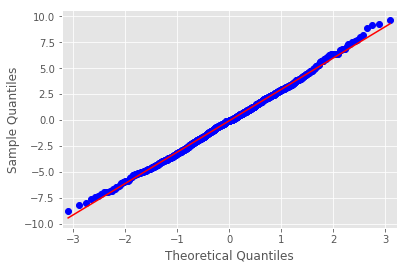

In [13]:
# Plot histograms and QQplots for above datasets
samples=[x_10,x_50,x_100,x_1000]
names=['x_10','x_50','x_100','x_1000']

i=0
for sample in samples:
    plt.hist(sample);
    plt.title(names[i])
    i+=1
    sm.graphics.qqplot(sample, line='s')
    plt.show()



#### Your comments here 
The samples get more normal the larger the sample size.  Even the smallest sample, however, has a pretty normal distribution.

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having the same number of values as data

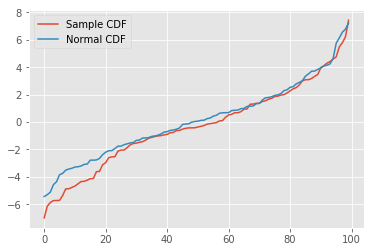

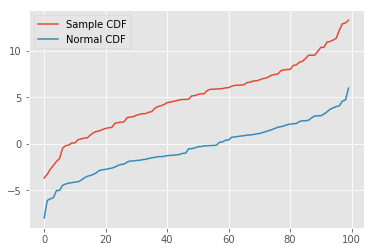

In [33]:
# You code here 
import seaborn as sns

def ks_plot(data):
    plt.plot(np.sort(data),label='Sample CDF')
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))),label="Normal CDF")
    plt.legend()
    plt.show()
    
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

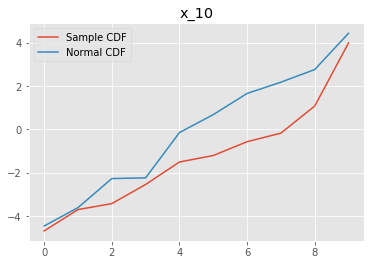

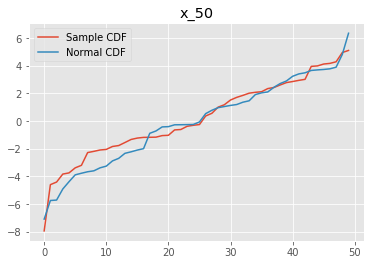

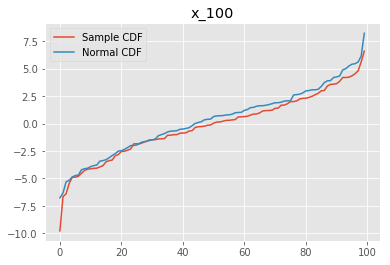

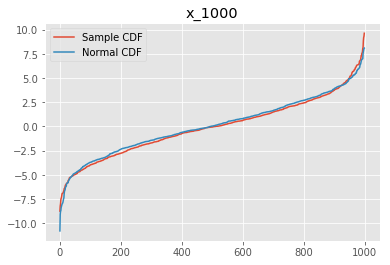

In [37]:
# Your code here 
i=0
for sample in samples:
    plt.title(names[i])
    ks_plot(sample)
    i+=1

In [35]:
# Your comments here 
# This confirms that, as the sample size gets larger, the sample distribution gets more normal.  In the last case,
# the sample and normal distributions are essentially the same.

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [46]:
# Perform KS test 
import scipy

for sample in samples:
    d,p=scipy.stats.kstest(sample, cdf='norm',N=len(sample),args=(0,3))
    print(d, p)

#KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

0.3234953230320883 0.19751253165564717
0.09566818994198101 0.7530059343626166
0.04941636011968867 0.9675556817513148
0.02484222022989177 0.5677722722991255


In [47]:
# Your comments here 
#p is greater than 0.05 for all the cases so we can't reject the null hypothesis for any of them which means
#that the samples are likely from the normal distribution.


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [54]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)

d,p=scipy.stats.kstest(x_uni, lambda x: x,N=len(x_uni))
print("uniform", d, p)
d1,p1=scipy.stats.kstest(x_uni, cdf='norm',N=len(x_uni),args=(0,3))
print('normal',d1, p1)

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

uniform 0.023983733919706984 0.6129909133094251
normal 0.5000116967980721 1.0364930169723052e-231


In [55]:
# Your comments here 
# the p-value for the KS test against the uniform distribution is high so we can't reject the null hypothesis
# that the sample is identical to the uniform distribution.
# the p-value against the normal distribution is 0 so we can reject the null hypothesis and say that x_uni
# is different from the normal distribution (which we expected).

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

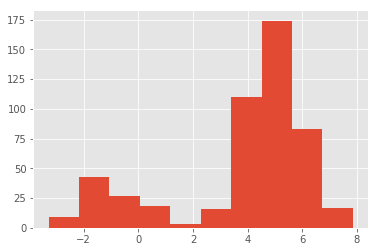

In [56]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

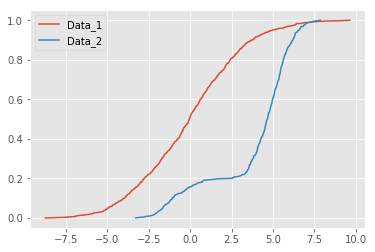

In [61]:

# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    plt.plot(np.sort(data_1),np.linspace(0, 1, len(data_1)),label='Data_1')
    plt.plot(np.sort(data_2),np.linspace(0, 1, len(data_2)),label="Data_2")
    plt.legend()
    plt.show()

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [63]:
# You comments here 
# They appear to be different.  The d value looks to be about 0.6 (at x=2.5)

### Run the two sample KS test on x_1000 and x_1000_bi and comment on the results

In [66]:
# Your code here
scipy.stats.ks_2samp(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.655, pvalue=2.316405684918646e-126)

In [67]:
# Your comments here 
#the d-value is 0.6, as seen on the graph.  The p-value is essentially 0 so the null hypothesis can be rejected
# and we can say that these two samples are not from the same distribution.



## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 